## **EDA**
Com a etapa de limpeza concluída e os dados devidamente tratados, agora darei início à Análise Exploratória de Dados (EDA). O objetivo desta fase é compreender melhor o comportamento das variáveis, identificar padrões, relações e possíveis insights que possam auxiliar nas etapas seguintes do projeto.

A análise será realizada de forma estruturada, dividida em diferentes níveis:

* **Análise Univariada:** avaliação individual de cada variável, observando distribuições, medidas de tendência central e dispersão.
* **Análise Bivariada:** investigação das relações entre duas variáveis, buscando possíveis correlações e dependências.
* **Testes de Hipótese:** aplicação de testes estatísticos para validar ou rejeitar suposições sobre os dados.
* **Análise Multivariada:** estudo conjunto de múltiplas variáveis para identificar padrões mais complexos e interações entre elas.

Essa abordagem organizada permitirá uma compreensão mais profunda dos dados e fornecerá bases sólidas para futuras modelagens e tomadas de decisão.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
used_cars = pd.read_csv("../Dados/used_car_train.csv", index_col=0)
used_cars.head()

,manufacturer,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price,transmission_simple,color_exterior_simple,color_interior_simple,drivetrain_simple,fuel_type_simple
561046,Nissan,2022,7963.0,19.5,0.0,1.0,1.0,4.2,19.0,35693.0,Automatic,red,black,4WD,Gasoline
390497,Jeep,2017,65998.0,21.5,0.0,0.0,1.0,4.8,335.0,22999.0,Automatic,white,black,4WD,Gasoline
13707,Other,2017,50986.0,29.0,0.0,0.0,1.0,4.8,90.0,23900.0,Manual,black,black,FWD,Gasoline
576420,Nissan,2018,74244.0,28.5,0.0,0.0,0.0,4.7,417.0,18988.0,Automatic,black,black,AWD,Gasoline
247684,Ford,2021,18908.0,23.5,0.0,0.0,0.0,4.8,31.0,34189.0,Automatic,gray,black,RWD,Gasoline


In [3]:
print(f"O dataset apresenta {used_cars.shape[0]} linhas e {used_cars.shape[1]} colunas")

O dataset apresenta 602355 linhas e 15 colunas


In [4]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602355 entries, 561046 to 123772
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   manufacturer           602355 non-null  object 
 1   year                   602355 non-null  int64  
 2   mileage                601981 non-null  float64
 3   mpg                    490753 non-null  float64
 4   accidents_or_damage    583470 non-null  float64
 5   one_owner              577782 non-null  float64
 6   personal_use_only      582957 non-null  float64
 7   driver_rating          577279 non-null  float64
 8   driver_reviews_num     602355 non-null  float64
 9   price                  602355 non-null  float64
 10  transmission_simple    594784 non-null  object 
 11  color_exterior_simple  595345 non-null  object 
 12  color_interior_simple  557615 non-null  object 
 13  drivetrain_simple      585705 non-null  object 
 14  fuel_type_simple       584692 non-nu

In [5]:
used_cars.describe()

,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price
count,602355.000000,6.019810e+05,490753.000000,583470.000000,577782.000000,582957.000000,577279.000000,602355.000000,6.023550e+05
mean,2017.788382,5.577203e+04,24.608405,0.228013,0.562667,0.657211,4.623896,89.716016,3.254244e+04
std,5.119842,4.355324e+04,6.523284,0.419552,0.496058,0.474642,0.276561,115.377022,2.720058e+04
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00
25%,2016.000000,2.327900e+04,21.000000,0.000000,0.000000,0.000000,4.500000,13.000000,1.959500e+04
50%,2019.000000,4.560900e+04,24.000000,0.000000,1.000000,1.000000,4.700000,51.000000,2.798900e+04
75%,2021.000000,7.830300e+04,28.000000,0.000000,1.000000,1.000000,4.800000,119.000000,3.947700e+04
max,2024.000000,1.119067e+06,127.500000,1.000000,1.000000,1.000000,5.000000,1025.000000,8.888889e+06


In [6]:
used_cars.select_dtypes(include="object").describe()

,manufacturer,transmission_simple,color_exterior_simple,color_interior_simple,drivetrain_simple,fuel_type_simple
count,602355,594784,595345,557615,585705,584692
unique,16,3,7,6,5,5
top,Other,Automatic,white,black,FWD,Gasoline
freq,140339,550550,142350,371829,195981,510039


Após a anailise dos dados acima, vemos que os dados estão prontos para as análises. Irei começar pela análise univariada.

# Análise Univariada

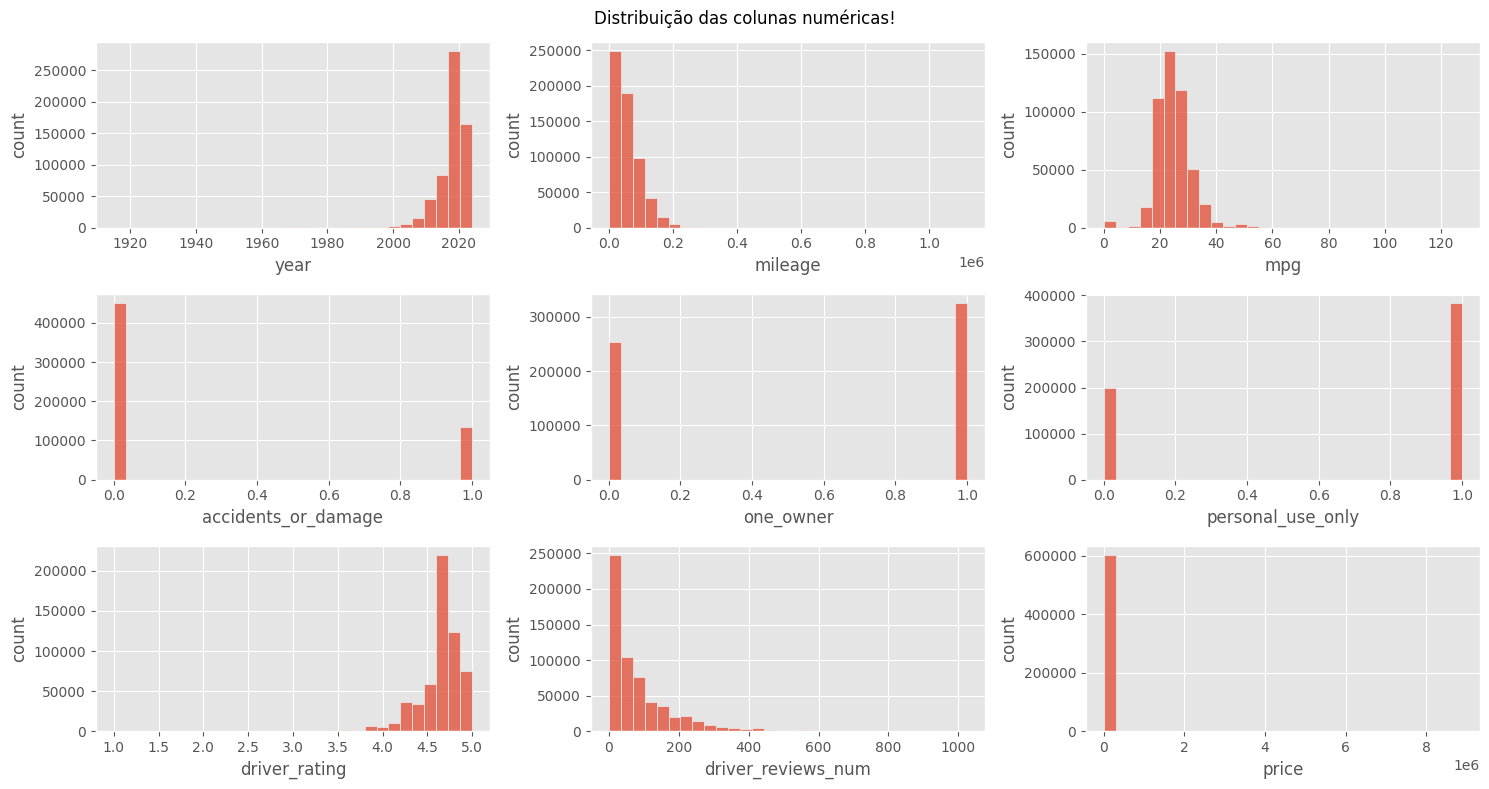

In [7]:
colunas_numericas = used_cars.select_dtypes(include="number").columns
plt.style.use("ggplot")
fig, axes = plt.subplots(figsize=(15, 8), ncols=3, nrows=3)
axes=axes.flatten()
plt.suptitle("Distribuição das colunas numéricas!")
for i, col in enumerate(colunas_numericas):
    sns.histplot(used_cars[col], bins=30, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("count")
    
plt.tight_layout()
plt.show()



Após a análise dos dados, observamos que:

* O dataset apresenta mais **carros recentes** do que antigos. No entanto, há um carro bem antigo que gerou um **outlier à esquerda**, deixando a distribuição assimétrica.
* Também percebemos que a maioria dos carros possui **baixa quilometragem**, mas existe um caso com quilometragem extremamente alta (1.000.000 km), o que merece uma análise mais detalhada.
* A maioria dos carros **não sofreu acidentes**, **teve apenas um dono** e foi utilizada **principalmente para uso pessoal**.
* As **notas dos motoristas** também são satisfatórias, geralmente entre 4 e 5.
* Alguns carros possuem **muitas avaliações** (entre 200 e 400), mas há casos excepcionais com até 1000 reviews.
* O **preço** apresenta o comportamento esperado, mas alguns carros possuem valores extremamente altos, configurando outliers que podem comprometer o desempenho de modelos de **clusterização** e **regressão**.

Dessa forma, será necessário analisar os carros com preços acima de **1 milhão** para verificar se esses valores são plausíveis ou se devem ser tratados como inconsistências.

In [8]:
used_cars[used_cars["price"]> 1000000]

,manufacturer,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price,transmission_simple,color_exterior_simple,color_interior_simple,drivetrain_simple,fuel_type_simple
613079,Other,2004,4376.0,13.0,0.0,0.0,1.0,4.3,2.0,1549991.0,Manual,silver,other,RWD,Gasoline
540908,Mercedes-Benz,2009,650.0,14.0,0.0,0.0,1.0,4.3,2.0,1150000.0,Automatic,gray,NaN,RWD,Gasoline
244466,Ford,2017,78920.0,22.0,NaN,NaN,NaN,NaN,0.0,1111111.0,Automatic,white,black,FWD,Other
49078,BMW,1996,121043.0,17.5,0.0,0.0,1.0,4.7,2.0,1750000.0,Automatic,black,black,FWD,Gasoline
213644,Ford,2020,1054.0,NaN,0.0,1.0,1.0,NaN,0.0,1149900.0,Automatic,black,NaN,RWD,Gasoline
615573,Other,2019,134.0,21.5,0.0,1.0,1.0,4.9,13.0,1200888.0,Manual,black,black,AWD,Gasoline
613085,Other,2005,780.0,13.0,0.0,0.0,0.0,4.5,5.0,2250000.0,Manual,silver,gray,RWD,Gasoline
84358,Other,1963,76.0,NaN,1.0,NaN,1.0,NaN,0.0,4999999.0,Automatic,black,gray,NaN,NaN
213658,Ford,2019,255.0,NaN,0.0,0.0,0.0,NaN,0.0,1275000.0,Automatic,red,NaN,NaN,Gasoline
636956,Other,2017,83000.0,NaN,NaN,NaN,NaN,NaN,0.0,3490000.0,Automatic,white,NaN,FWD,Gasoline


#### 📊 Visão Geral do Dataset
- **Total de registros analisados**: 17 carros com preço > $1.000.000
- **Percentual do dataset total**: ≈ 0,0028% (17 de ~600.000 registros)

---

#### 🎯 Decisão de Tratamento

##### ✅ **CARROS A MANTER** (11 registros)
**Motivo**: Carros exóticos, de coleção ou edições especiais com valores condizentes com o mercado

| Manufacturer | Modelo | Ano | Preço | Motivo da Manutenção |
|--------------|--------|-----|-------|---------------------|
| Porsche | Carrera GT Base (M6) | 2004 | $1.549.991 | Supercarro raro, valor de mercado |
| Mercedes-Benz | SLR McLaren | 2009 | $1.150.000 | Supercarro, quilometragem baixa |
| Porsche | 911 Turbo S | 2019 | $1.200.888 | Supercarro moderno, quase zero km |
| Porsche | Carrera GT | 2005 | $2.250.000 | Supercarro raro, valor apropriado |
| Ford | GT | 2020 | $1.149.900 | Supercarro, baixa quilometragem |
| Ford | GT | 2019 | $1.275.000 | Supercarro, valor condizente |
| Ford | GT EDITION VIN 002 | 2018 | $1.575.000 | Edição especial, quase zero km |
| Porsche | Carrera GT | 2005 | $1.499.177 | Supercarro, valor realista |
| Porsche | Carrera GT | 2005 | $1.650.000 | Supercarro, baixa quilometragem |
| Porsche | 918 Spyder Base (PDK) | 2015 | $2.099.995 | Híbrido, supercarro raro |
| Porsche | 911 Turbo 3.6 | 1994 | $1.350.000 | Clássico colecionável |

---

##### ❌ **CARROS A REMOVER** (6 registros)
**Motivo**: Valores claramente inconsistentes, erros de digitação ou dados implausíveis

| Manufacturer | Modelo | Ano | Preço | Motivo da Remoção |
|--------------|--------|-----|-------|------------------|
| Ford | Sedan Police Interceptor Base | 2017 | $1.111.111 | Carro de polícia usado, valor deveria ser ~$20k |
| Cadillac | DeVille 77 HOURS ON ENGINES | 1963 | $4.999.999 | Valor absurdo para modelo comum |
| RAM | ProMaster 3500 High Roof | 2017 | $3.490.000 | Van comercial, valor deveria ser ~$30k |
| Cadillac | DTS | 2006 | $1.111.111 | Sedan comum com alta quilometragem |
| Ford | Utility Police Interceptor Base | 2016 | $8.888.889 | Padrão numérico repetitivo (erro claro) |
| BMW | 750 iL | 1996 | $1.750.000 | **Erro provável de digitação** (deveria ser $175k) |


In [9]:
# Primeiro: remover os casos óbvios por ID
ids_obvios = [244466, 84358, 91190, 224571]
used_car_clean = used_cars[~used_cars.index.isin(ids_obvios)]

# Segundo: remover outros padrões problemáticos
padroes_problematicos = (
    (used_car_clean['manufacturer'] == 'RAM') & 
    (used_car_clean['price'] > 100000)
)

used_car_clean = used_car_clean[~padroes_problematicos]

# Terceiro: verificar o BMW separadamente (corrigir em vez de remover)
bmw_anomalo = used_car_clean[
    (used_car_clean['manufacturer'] == 'BMW') & 
    (used_car_clean['price'] > 1000000)
]

if not bmw_anomalo.empty:
    # Corrigir o preço (provavelmente erro de digitação - $175,000 em vez de $1,750,000)
    used_car_clean.loc[bmw_anomalo.index, 'price'] = 175000.0
    print("Preço do BMW corrigido de $1.750.000 para $175.000")

print(f"Total de registros removidos: {len(used_cars) - len(used_car_clean)}")
print(f"Dataset limpo: {len(used_car_clean)} registros")

Preço do BMW corrigido de $1.750.000 para $175.000
Total de registros removidos: 4
Dataset limpo: 602351 registros


A variável mpg (miles per gallon) representa a eficiência de combustível dos carros, ou seja, quantas milhas o veículo percorre por galão de combustível. Quanto maior o valor, mais econômico é o carro. Ao analisar essa variável, foi identificado um registro com valor 120 mpg, enquanto a maioria dos veículos apresenta valores que não ultrapassam 28 mpg. Esse ponto destoa bastante do padrão esperado e, portanto, pode ser considerado um outlier.

In [10]:
outlier_mpg=used_car_clean[used_car_clean["mpg"]>80]
outlier_mpg


,manufacturer,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price,transmission_simple,color_exterior_simple,color_interior_simple,drivetrain_simple,fuel_type_simple
232743,Ford,2019,128081.0,127.5,1.0,0.0,0.0,5.0,2.0,36995.0,Automatic,white,gray,RWD,Gasoline
218504,Ford,2019,20100.0,127.5,0.0,1.0,1.0,4.5,101.0,83990.0,Manual,black,black,4WD,Diesel
735840,Volkswagen,2019,53265.0,118.5,0.0,0.0,1.0,4.5,259.0,19790.0,Automatic,blue,black,FWD,Gasoline
694495,Toyota,2018,34122.0,121.0,1.0,1.0,1.0,4.6,48.0,23874.0,Automatic,other,black,FWD,Gasoline
722315,Toyota,2015,141189.0,102.0,0.0,1.0,0.0,4.5,7.0,13999.0,Automatic,silver,gray,FWD,Gasoline
23099,Other,2022,7126.0,94.5,0.0,1.0,1.0,4.2,2.0,59640.0,Automatic,black,black,AWD,Gasoline
220411,Ford,2020,115001.0,127.5,0.0,0.0,0.0,4.8,2.0,49990.0,Manual,white,black,RWD,Gasoline
23123,Other,2022,4482.0,94.5,0.0,1.0,1.0,4.2,2.0,55950.0,Automatic,black,black,AWD,Gasoline
722235,Toyota,2012,138088.0,102.0,0.0,0.0,1.0,4.5,30.0,12500.0,Automatic,blue,gray,FWD,Hybrid
23128,Other,2022,2343.0,94.5,0.0,1.0,1.0,4.2,2.0,54453.0,Automatic,white,beige,AWD,Gasoline


Na análise da variável mpg, foram identificados alguns registros com valores acima de 80, o que é fisicamente improvável, considerando que a maioria dos veículos apresenta consumo até cerca de 28 mpg. Além disso, mesmo os recordes mundiais de eficiência atingidos por veículos híbridos, como o Toyota Prius, registraram médias em torno de 93,158 mpg, o que demonstra que valores muito acima desse patamar representam carros inviáveis na prática. Como esses registros representam uma fração muito pequena do dataset (menos de 1%), optou-se por remover esses outliers, garantindo que os dados reflitam situações plausíveis de consumo e não distorçam a modelagem.

In [11]:
used_car_clean=used_car_clean[used_car_clean["mpg"]<80]

Também foi identificado um outlier na variável mileage, com valores acima de 1.000.000 km, que podem representar um erro de registro ou casos extremos de veículos com uso muito intenso. Para tratar isso de forma criteriosa, irei filtrar os carros com quilometragem acima de 500.000 km e analisar cada registro, avaliando se devem ser removidos, corrigidos ou mantidos na base.

In [12]:
used_car_clean[used_car_clean["mileage"]>=5e+05]

,manufacturer,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price,transmission_simple,color_exterior_simple,color_interior_simple,drivetrain_simple,fuel_type_simple
701619,Toyota,2010,544999.0,30.5,0.0,0.0,1.0,4.5,187.0,13995.0,Automatic,black,gray,FWD,Gasoline
302334,Honda,2020,754680.0,23.0,0.0,1.0,1.0,4.3,156.0,20499.0,Automatic,white,black,FWD,Gasoline
552522,Other,2009,514317.0,23.5,1.0,0.0,0.0,4.4,21.0,4500.0,Automatic,other,gray,FWD,Gasoline
157346,Other,2021,724500.0,23.5,0.0,1.0,0.0,5.0,1.0,20491.0,Automatic,black,black,FWD,Gasoline
756847,Other,2010,1119067.0,19.0,0.0,0.0,1.0,4.3,17.0,16997.0,Automatic,black,beige,AWD,Gasoline
316531,Honda,2006,543099.0,18.5,1.0,1.0,1.0,4.6,103.0,6999.0,Automatic,black,gray,4WD,Gasoline
121155,Chevrolet,2018,653132.0,29.0,0.0,1.0,1.0,4.6,206.0,15287.0,Automatic,silver,black,FWD,Gasoline
76422,Other,1998,999999.0,23.5,0.0,0.0,1.0,4.1,11.0,1995.0,Automatic,other,red,FWD,Gasoline
481170,Lexus,2014,680094.0,23.5,NaN,NaN,NaN,4.7,70.0,21700.0,Automatic,white,NaN,AWD,Gasoline
319941,Honda,2013,938032.0,33.5,0.0,0.0,1.0,4.6,287.0,14816.0,Automatic,blue,black,FWD,Gasoline


Observa-se que o dataset contém veículos com quilometragem muito alta, que fogem do padrão da maioria dos carros usados. Como não é possível confirmar se esses valores são erros de registro ou dados reais, optou-se por manter esses registros na base, garantindo que nenhum dado potencialmente válido seja removido de forma arbitrária.

Irei continuar na analise univariada, mas com as variaveis categóricas.

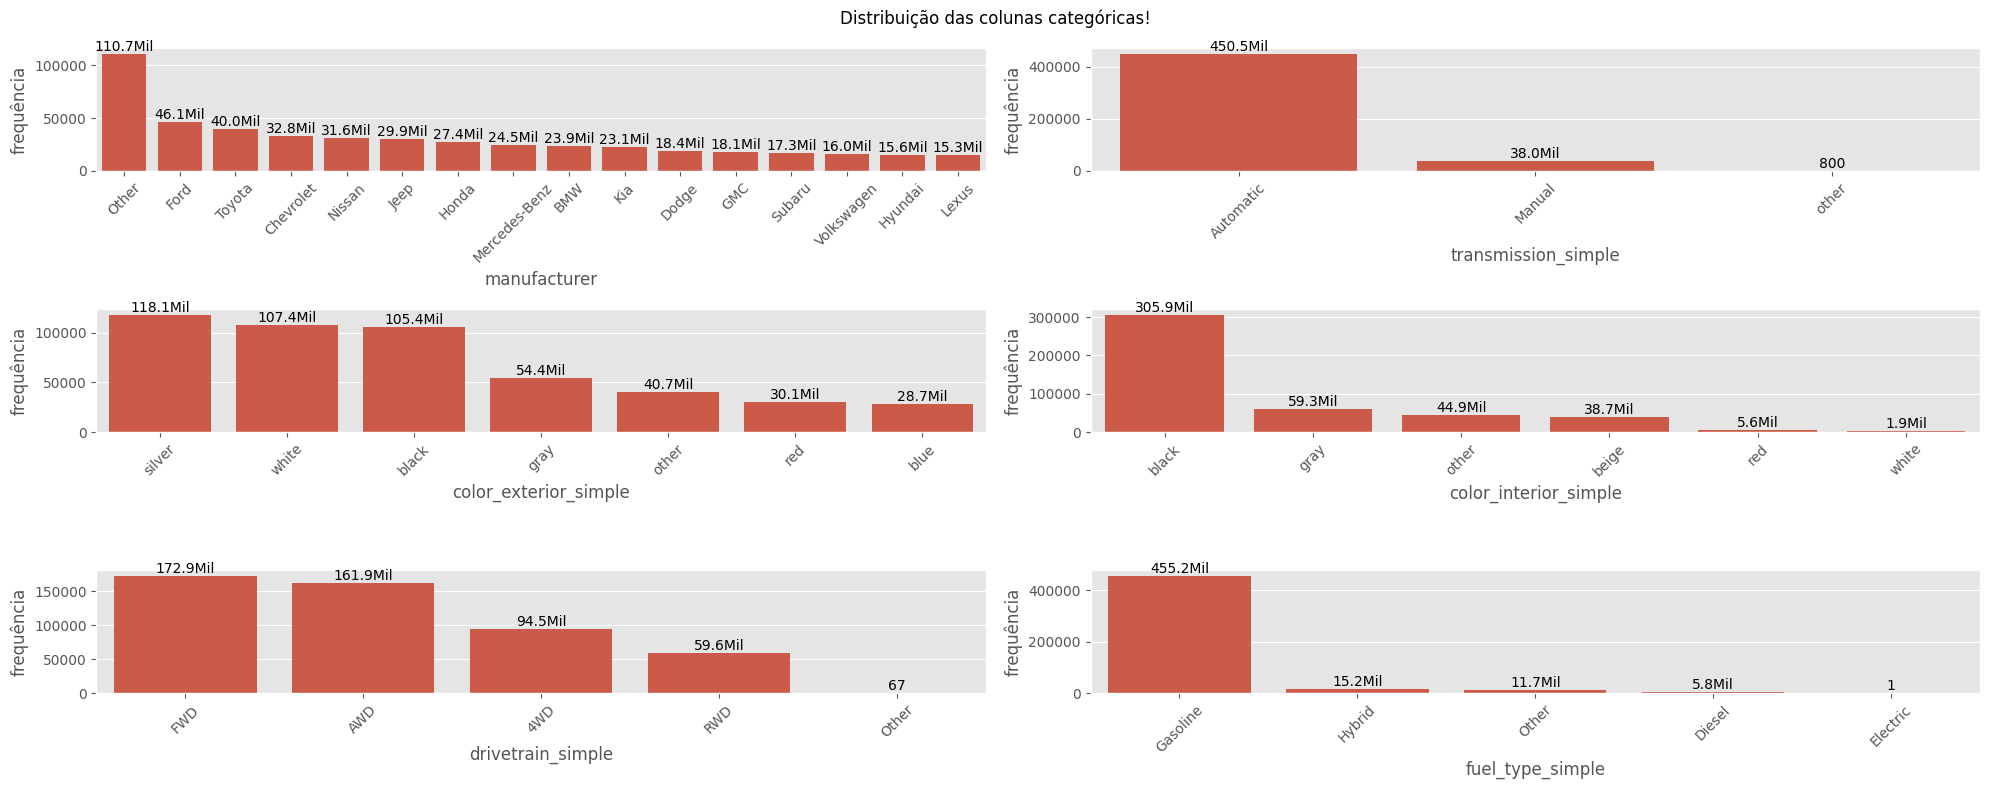

In [13]:
colunas_categoricas = used_car_clean.select_dtypes(include="object").columns
fig, axes = plt.subplots(figsize=(20, 8), ncols=2, nrows=3)
axes=axes.flatten()
plt.suptitle("Distribuição das colunas categóricas!")
for i, col in enumerate(colunas_categoricas):
    freq_colunas_cat = used_car_clean[col].value_counts().reset_index()
    freq_colunas_cat.columns = [col, "frequência"]
    sns.barplot(freq_colunas_cat, x=col, y="frequência", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("frequência")
    axes[i].set_xticks(rotation=45, ticks = freq_colunas_cat[col], labels = freq_colunas_cat[col])
    for j, v in enumerate(freq_colunas_cat["frequência"]):
        v_str = str(v)
        if v > 1000:
            v_str=f"{int(v)/1000:.1f}Mil"
        else:
            pass
        axes[i].text(j, v, v_str, ha="center", va="bottom")
    
    
    
plt.tight_layout()
plt.show()


Após a análise dos dados, podemos destacar algumas tendências importantes que refletem o mercado de veículos:

* **Manufacturer**: Ford, Toyota e Chevrolet aparecem como as marcas mais representativas da base. Marcas menos frequentes foram agrupadas como **Other**, o que mostra que o mercado é concentrado em algumas fabricantes populares.
* **Transmission**: A predominância de veículos **Automatic** reflete a tendência do mercado atual, em que a maioria dos consumidores prefere câmbios automáticos pela praticidade.
* **Color Exterior**: As cores mais comuns, **silver**, **white** e **black**, indicam uma preferência do mercado por tons neutros e versáteis, que costumam ter maior valorização na revenda.
* **Color Interior**: O interior **black** é o mais frequente, reforçando a preferência por cores que combinam com diferentes estilos de carroceria e exigem menor manutenção visual.
* **Drivetrain**: **FWD** e **AWD** são os tipos de tração mais utilizados, refletindo a predominância de veículos urbanos e SUVs no mercado atual.
* **Fuel Type**: A **gasolina** domina como combustível principal, indicando que, apesar do crescimento de híbridos e elétricos, o mercado ainda é majoritariamente movido a combustíveis fósseis.

Finalizando a parte da analise univariada, irei partir para analise bivariada, relacionando as features com a target(price)


## Análise Bivariada

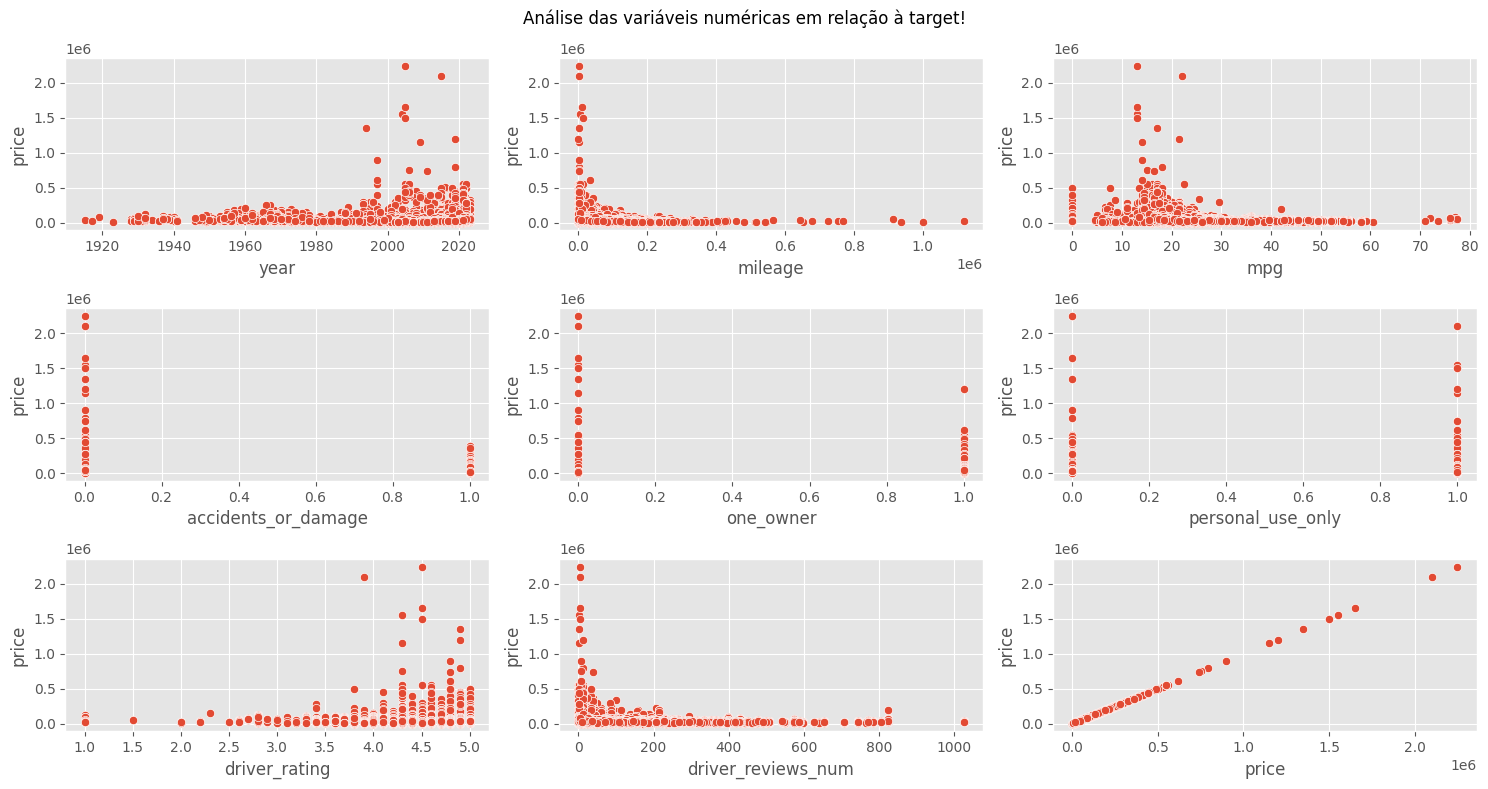

In [14]:

fig, axes = plt.subplots(figsize=(15, 8), ncols=3, nrows=3)
axes=axes.flatten()
plt.suptitle("Análise das variáveis numéricas em relação à target!")
for i, col in enumerate(colunas_numericas):
    sns.scatterplot(x=used_car_clean[col], y=used_car_clean["price"], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("price")
    
plt.tight_layout()
plt.show()


#### Observações por variável:

1. **year × price**

   * Carros mais novos (após ~2000) tendem a ter maior preço.
   * Há outliers de carros antigos muito caros (provavelmente carros de coleção).

2. **mileage × price**

   * Quanto maior a quilometragem, menor o preço (relação inversa clara).
   * Poucos casos de carros com alta quilometragem e preço elevado → provavelmente outliers/erros.

3. **mpg × price**

   * Muitos carros concentrados entre 10–30 mpg.
   * Preços altos não parecem seguir padrão forte com mpg, mas carros de consumo extremo (muito baixo ou muito alto mpg) não têm preços elevados.

4. **accidents_or_damage × price**

   * Carros sem acidentes (0) apresentam grande variação de preço, inclusive os mais caros.
   * Carros com registro de acidente/dano (1) têm preços mais baixos (faz sentido).

5. **one_owner × price**

   * Tendência de preços maiores em carros com único dono (1).
   * Mas há dispersão: não é regra absoluta.

6. **personal_use_only × price**

   * Carros de uso pessoal (1) apresentam mais dispersão e incluem alguns preços altos.
   * Carros de uso não-pessoal (0) parecem concentrar preços mais baixos.

7. **driver_rating × price**

   * Correlação positiva: carros com maior nota tendem a valer mais.
   * A dispersão cresce com a nota, mas nota alta parece associada a preços mais altos.

8. **driver_reviews_num × price**

   * Muitos veículos com poucas reviews e preços variados.
   * Poucos veículos com muitas reviews → e nesses casos, em geral preços mais baixos (provavelmente carros populares).

#### Conclusões principais:

* **Fatores que mais influenciam positivamente o preço:**

  * Ano de fabricação (quanto mais novo, maior o preço).
  * Boa avaliação do motorista (**driver_rating**).
  * Único dono (**one_owner = 1**).

* **Fatores que reduzem preço:**

  * Alta quilometragem.
  * Acidentes/danos registrados.
  * Muitas reviews (indicando popularidade de carros mais baratos).

* **Fatores neutros/fracos:**

  * Consumo (mpg) não mostra relação clara.
  * Uso pessoal vs. não-pessoal mostra diferença, mas menos significativa.


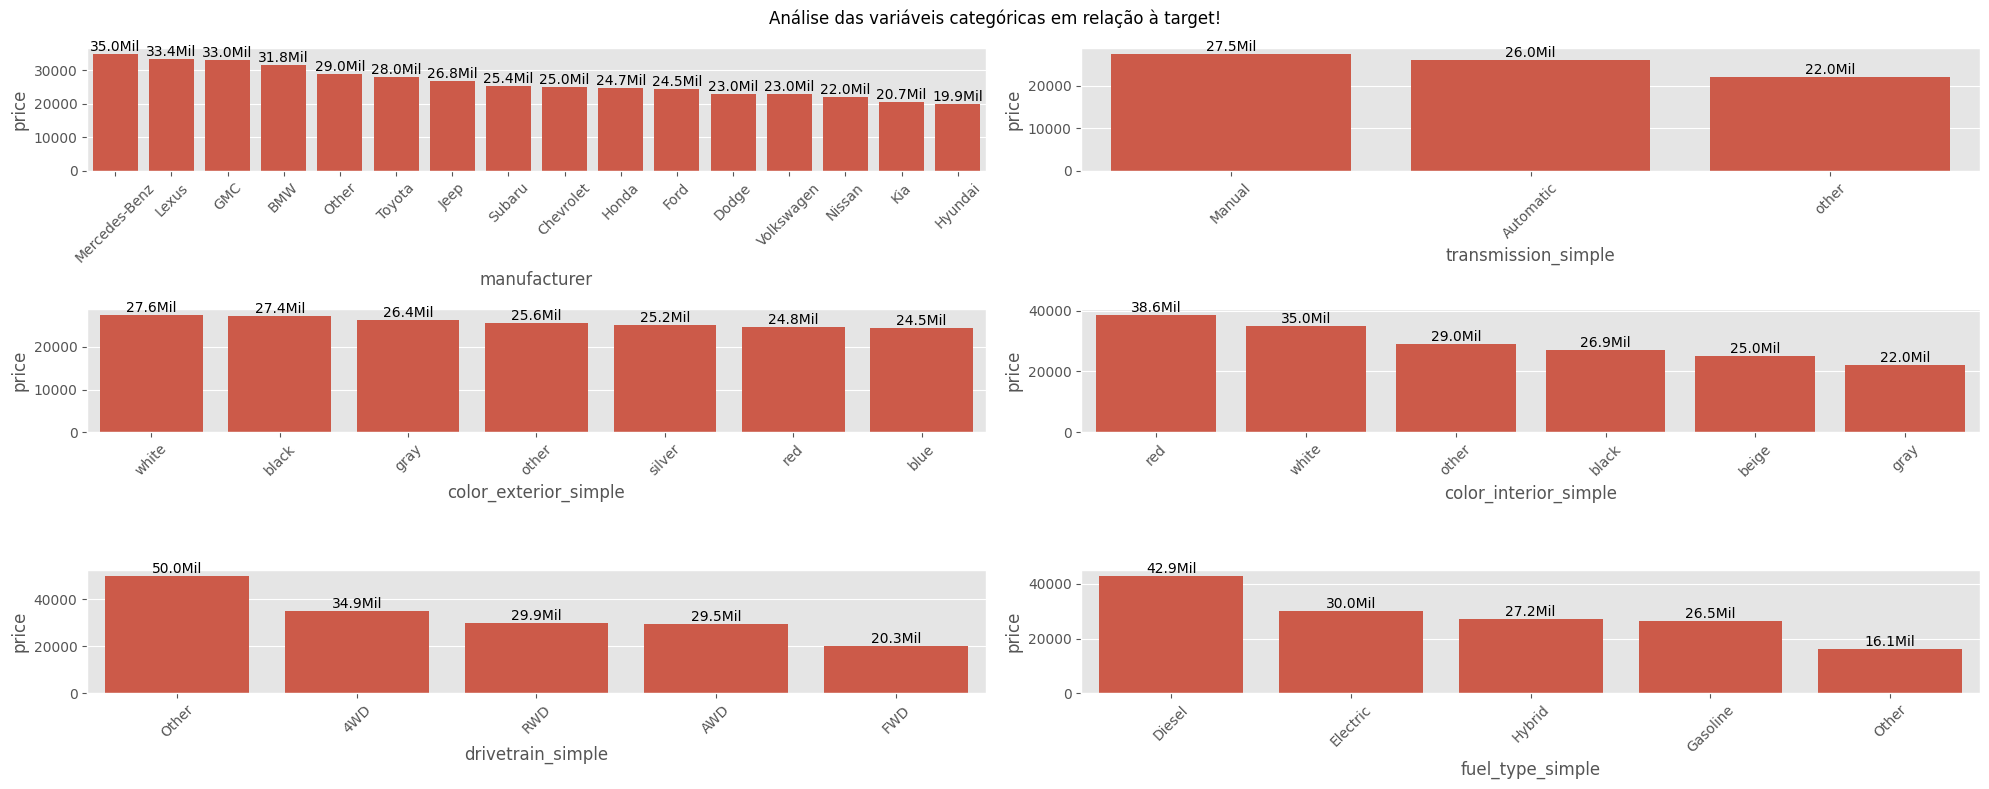

In [15]:
fig, axes = plt.subplots(figsize=(20, 8), ncols=2, nrows=3)
axes=axes.flatten()
plt.suptitle("Análise das variáveis categóricas em relação à target!")
for i, col in enumerate(colunas_categoricas):
    cat_precos = used_car_clean[[col, "price"]].groupby(col).median().reset_index().sort_values(by="price", ascending=False)
    cat_precos.columns = [col, "Mediana de preços"]
    sns.barplot(x=cat_precos[col], y=cat_precos["Mediana de preços"], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("price")
    axes[i].set_xticks(rotation=45, ticks = cat_precos[col], labels = cat_precos[col])
    for j, v in enumerate(cat_precos["Mediana de preços"]):
        v_str = str(v)
        if v > 1000:
            v_str=f"{int(v)/1000:.1f}Mil"
        else:
            pass
        axes[i].text(j, v, v_str, ha="center", va="bottom")
    
plt.tight_layout()
plt.show()



Na análise, utilizei a **mediana** em vez da média, pois observamos a presença de **outliers** que poderiam distorcer a média. A mediana nos dá uma visão mais robusta do comportamento típico dos preços. Alguns insights interessantes surgem a partir dessa análise:

* **Marca (manufacturer):** Mercedes, Lexus, GMC e BMW apresentam os **maiores preços medianos**, refletindo o perfil de veículos de luxo.
* **Transmissão (transmission):** Carros **manuais** são menos frequentes, mas apresentam uma **diferença de preço leve** em relação aos automáticos, cerca de 1,5 mil, não sendo tão expressiva.
* **Cor externa (color_exterior):** As cores têm valores medianos similares, com **black** e **white** se destacando um pouco mais.
* **Cor interna (color_interior):** A cor **red (vermelha)** apresenta preços medianos acima dos demais, possivelmente indicando veículos de luxo; a cor **white** também se destaca.
* **Tração (drivetrain):** Os valores medianos são similares entre FWD, AWD e RWD, com uma leve diferença a favor do 4WD. Os veículos classificados como **Other** apresentam uma mediana de 50 mil, muito acima do 4WD (35 mil), mas isso pode ser influenciado pelo **pequeno número de registros** (64), enquanto as outras categorias têm dezenas de milhares de registros.
* **Tipo de combustível (fuel_type):** Diesel apresenta mediana de 43,9 mil, eletric (1 registro) não é representativo, e gasolina, com muitos registros, apresenta uma mediana de 26,5 mil.

Para confirmar as hipóteses levantadas a partir da análise exploratória, irei aplicar testes estatísticos apropriados, que permitirão validar de forma quantitativa os padrões observados nos dados.


## Testes Estatísticos

Primeiramente, irei verificar se a variável price segue uma distribuição normal. A definição da distribuição é importante, pois a escolha dos testes estatísticos para validação das hipóteses dependerá disso: métodos paramétricos são indicados para dados normalmente distribuídos, enquanto métodos não paramétricos são mais adequados para distribuições que não seguem a normalidade.

In [16]:
from scipy.stats import normaltest,kruskal,spearmanr

stats, p = normaltest(used_car_clean["price"])
if p > 0.05:
    print("Distribuição normal")
else:
    print("Distribuição não normal")

Distribuição não normal


Como já foi observado nos gráficos anteriores e agora no teste estatístico, que a distribuição da variável price não segue uma normalidade, irei utilizar testes estatísticos não paramétricos, que não assumem normalidade em suas fórmulas, para validar as hipóteses levantadas durante a análise exploratória.Como já foi observado nos gráficos anteriores que a distribuição da variável price não segue uma normalidade, irei utilizar testes estatísticos não paramétricos, que não assumem normalidade em suas fórmulas, para validar as hipóteses levantadas durante a análise exploratória.

#### **Variaveis Numéricas**

In [17]:
colunas_numericas_influenciam_preco = ['year', 'mileage', 'driver_rating', 'driver_reviews_num', 'mpg']
for col in colunas_numericas_influenciam_preco:
    dados_validos = used_car_clean[[col, "price"]].dropna()  # remove pares com NaN
    if dados_validos[col].nunique() <= 1:  # se só tem 1 valor único
        print(f"{col.upper()} | Não é possível calcular (coluna constante ou só 1 valor)")
        continue

    stats, p = spearmanr(dados_validos[col], dados_validos["price"])
    if np.isnan(stats):  # se ainda assim deu NaN
        print(f"{col.upper()} | Não foi possível calcular (valores inválidos)")
    else:
        direcao = "positiva" if stats > 0 else "negativa"
        print(f"{col.upper()} | rho={stats:.3f}, p={p:.3e}")
        if p > 0.05:
            print(f"Não há relação significativa entre {col} e preço")
        else:
            print(f"Há relação {direcao} entre {col} e preço (rho={stats:.3f})")


YEAR | rho=0.648, p=0.000e+00
Há relação positiva entre year e preço (rho=0.648)
MILEAGE | rho=-0.662, p=0.000e+00
Há relação negativa entre mileage e preço (rho=-0.662)
DRIVER_RATING | rho=0.283, p=0.000e+00
Há relação positiva entre driver_rating e preço (rho=0.283)
DRIVER_REVIEWS_NUM | rho=-0.426, p=0.000e+00
Há relação negativa entre driver_reviews_num e preço (rho=-0.426)
MPG | rho=-0.352, p=0.000e+00
Há relação negativa entre mpg e preço (rho=-0.352)


Os testes confirmaram que as variáveis analisadas apresentam correlação significativa com o preço, o que valida as análises feitas anteriormente. No entanto, para entender com mais precisão a força e a interação dessas relações, irei aprofundar a investigação por meio de uma análise multivariada. Irei analisar as colunas binarias e depois as colunas categóricas.

#### **Variaveis Binárias**

In [18]:
colunas_binarias_influenciam_preco = [ 'accidents_or_damage', 'one_owner','personal_use_only']
for col in colunas_binarias_influenciam_preco:
    dados_validos = used_car_clean[[col, "price"]].dropna()  # remove pares com NaN
    if dados_validos[col].nunique() <= 1:  # se só tem 1 valor único
        print(f"{col.upper()} | Não é possível calcular (coluna constante ou só 1 valor)")
        continue
    dados_1 = dados_validos[dados_validos[col]==1]["price"]
    dados_0 = dados_validos[dados_validos[col]==0]["price"]
    stat, p = kruskal(dados_1, dados_0)
    if np.isnan(stats):  # se ainda assim deu NaN
        print(f"{col.upper()} | Não foi possível calcular (valores inválidos)")
    else:
        direcao = "positiva" if stats > 0 else "negativa"
        print(f"{col.upper()} | rho={stats:.3f}, p={p:.3e}")
        if p > 0.05:
            print(f"Não há relação significativa entre {col} e preço")
        else:
            print(f"Há relação {direcao} entre {col} e preço (rho={stats:.3f})")

ACCIDENTS_OR_DAMAGE | rho=-0.352, p=0.000e+00
Há relação negativa entre accidents_or_damage e preço (rho=-0.352)
ONE_OWNER | rho=-0.352, p=0.000e+00
Há relação negativa entre one_owner e preço (rho=-0.352)
PERSONAL_USE_ONLY | rho=-0.352, p=3.818e-104
Há relação negativa entre personal_use_only e preço (rho=-0.352)


Os resultados dos testes estatísticos mostram que as variáveis accidents_or_damage, one_owner e personal_use_only apresentam uma relação negativa com o preço dos veículos, ou seja, a presença dessas condições tende a reduzir o valor de mercado dos carros.

Apesar de todas apresentarem p-valores extremamente baixos, indicando significância estatística, a variável personal_use_only possui um p-valor relativamente maior em comparação às outras, sugerindo que sua influência no preço é menos pronunciada. Isso está alinhado com a análise exploratória anterior, onde a diferença de preços observada para essa variável foi pequena.

#### **Variaveis Categórica**

In [19]:

for col in colunas_categoricas:
    dados_validos = used_car_clean[[col, "price"]].dropna()  # remove pares com NaN
    if dados_validos[col].nunique() <= 1:  # se só tem 1 valor único
        print(f"{col.upper()} | Não é possível calcular (coluna constante ou só 1 valor)")
        continue
    
    grupos = [group["price"].values for _, group in dados_validos.groupby(col)]
    stat, p = kruskal(*grupos)
    
    if np.isnan(stat):  # se ainda assim deu NaN
        print(f"{col.upper()} | Não foi possível calcular (valores inválidos)")
    else:
        print(f"{col.upper()} | p={p:.3e}")
        if p > 0.05:
            print(f"Não há relação significativa entre {col} e preço\n")
        else:
            print(f"Há relação entre {col} e preço\n")


MANUFACTURER | p=0.000e+00
Há relação entre manufacturer e preço

TRANSMISSION_SIMPLE | p=3.383e-42
Há relação entre transmission_simple e preço

COLOR_EXTERIOR_SIMPLE | p=0.000e+00
Há relação entre color_exterior_simple e preço

COLOR_INTERIOR_SIMPLE | p=0.000e+00
Há relação entre color_interior_simple e preço

DRIVETRAIN_SIMPLE | p=0.000e+00
Há relação entre drivetrain_simple e preço

FUEL_TYPE_SIMPLE | p=0.000e+00
Há relação entre fuel_type_simple e preço





Manufacturer, Transmission, Cores (interna e externa), Drivetrain e Fuel type
Todos apresentaram p-valores próximos de zero, indicando que as diferenças de preço entre as categorias são estatisticamente significativas.

Isso confirma a hipótese levantada na EDA: certas marcas, tipos de transmissão, cores e tipos de combustível têm forte relação com a precificação dos veículos.

## Análise Multivariada

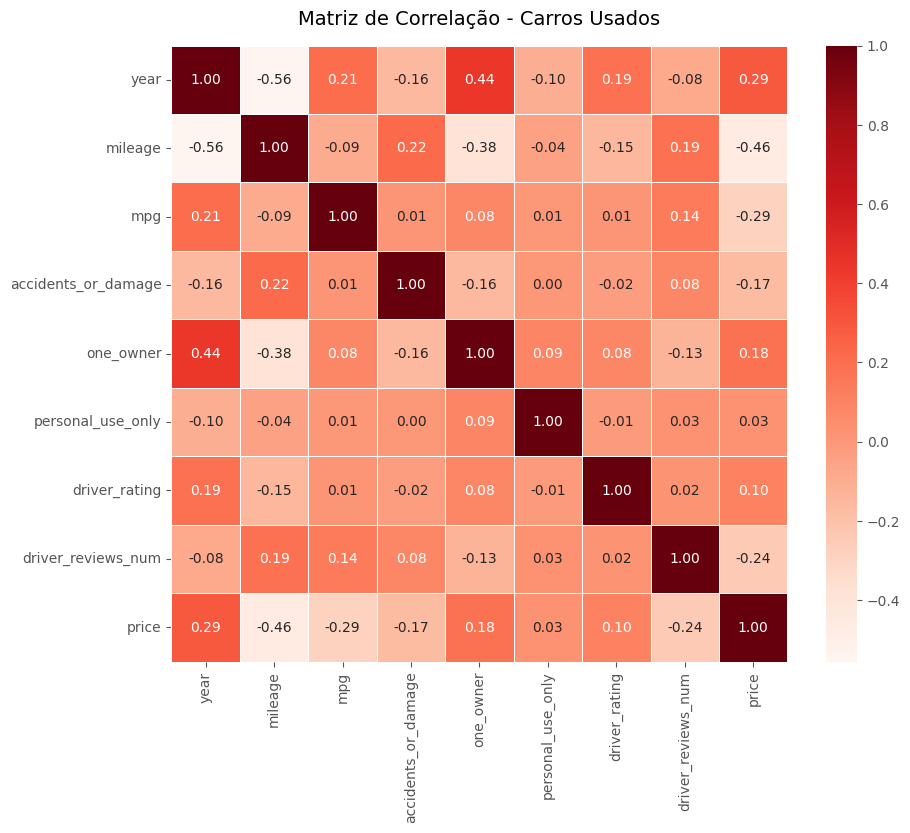

In [20]:
corr = used_car_clean[colunas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,         # mostra os valores
    fmt=".2f",          # duas casas decimais
    cmap="Reds",        # paleta em tons de vermelho
    cbar=True,          # barra lateral
    square=True,        # quadrados perfeitos
    linewidths=0.5,     # linhas entre quadrados
    linecolor="white"
)

plt.title("Matriz de Correlação - Carros Usados", fontsize=14, pad=15)
plt.show()



### Análise de Correlação com o Preço

* **Driver_reviews_num (-0.24):** Existe uma correlação negativa, indicando que carros com maior número de avaliações tendem a ter preços menores. Isso pode estar relacionado ao fato de que veículos mais acessíveis ou populares recebem mais avaliações.

* **One_owner (0.18):** A correlação positiva, embora fraca, sugere que carros com apenas um dono tendem a apresentar preços um pouco maiores, possivelmente devido ao perfil dos veículos anunciados ou ao mercado específico analisado.

* **Accidents_or_damage (-0.17):** Observa-se que veículos com histórico de acidentes ou danos tendem a ter preços mais baixos, o que é consistente com a expectativa de desvalorização nesses casos.

* **MPG (-0.27):** A correlação negativa indica que carros com menor eficiência de combustível (menor número de milhas por galão) tendem a ter preços mais altos, o que pode estar associado a veículos mais potentes ou de categorias superiores.

* **Mileage (-0.47):** Essa é a correlação mais forte entre as analisadas, mostrando que veículos com menor quilometragem percorrida têm preços significativamente mais altos. Além disso, como esperado, carros mais recentes também tendem a ser mais valorizados no mercado.


Agora que os dados já foram analisados, podemos salvar o dataset de treino e partir para acriação de clusters.


In [21]:
used_car_clean.to_csv("../Dados/used_car_train.csv")


### **Resumo da Análise Exploratória (EDA)**

Na análise exploratória, utilizamos a **mediana** para resumir os preços, devido à presença de **outliers** que poderiam distorcer a média. Alguns insights importantes foram identificados:

* **Marca (manufacturer):** Mercedes, Lexus, GMC e BMW apresentam os maiores preços medianos, refletindo o perfil de veículos de luxo.
* **Transmissão (transmission):** Carros manuais são menos frequentes e apresentam uma diferença de preço leve (~1,5 mil) em relação aos automáticos.
* **Cores:** Exterior – **black** e **white** se destacam; Interior – **red** indica veículos de luxo, com a cor white também relevante.
* **Tração (drivetrain):** Valores medianos similares, com leve vantagem para 4WD; categoria “Other” tem mediana alta, mas com poucos registros.
* **Combustível (fuel_type):** Diesel apresenta maior preço mediano; gasolina, mais frequente, mediana de 26,5 mil; elétrico não é representativo (1 registro).

---

### **Insights por variável numérica**

* **Ano (year):** Carros mais novos tendem a ter preços mais altos.
* **Quilometragem (mileage):** Maior quilometragem → preço menor; menor quilometragem → preço mais alto.
* **MPG:** Relação menos clara, mas extremos de consumo não apresentam preços elevados.
* **Acidentes/danos (accidents_or_damage):** Veículos sem acidentes tendem a preços mais altos; com acidentes, preços menores.
* **One_owner:** Tendência de preços maiores para carros com único dono.
* **Uso pessoal (personal_use_only):** Diferença menos significativa; carros de uso pessoal apresentam maior dispersão de preços.
* **Driver_rating:** Correlação positiva com preço.
* **Driver_reviews_num:** Correlação negativa; carros com muitas avaliações tendem a ter preços menores.

---

### **Correlação com o preço**

* **Mileage (-0.47):** Quanto menor a quilometragem, maior o preço (maior correlação observada).
* **MPG (-0.27):** Menor eficiência → preço maior.
* **Driver_reviews_num (-0.24):** Mais avaliações → preço menor.
* **Accidents_or_damage (-0.17):** Histórico de acidentes → preço menor.
* **One_owner (0.18):** Carro com único dono tende a valor ligeiramente maior.

---

### **Conclusão**

A EDA indica que **preço é positivamente influenciado por ano de fabricação, boa avaliação e único dono**, e **negativamente influenciado por quilometragem, acidentes/danos e número de avaliações**. Outras variáveis, como consumo e uso pessoal, têm efeito mais fraco.

Agora que os dados foram explorados e entendidos, o próximo passo será **salvar o dataset de treino e aplicar técnicas multivariadas**, começando pela **criação de clusters**.

